In [73]:
import warnings
from tokenize import endpats

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statannotations.Annotator import Annotator
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('source/FReDA4.csv')

In [75]:
def val_to_category(val):
    if val <= 0.3:
        return 0
    elif 0.3 < val <= 1.5:
        return 1
    elif 1.5 < val <= 2.5:
        return 2
    elif 2.5 < val <= 3.5:
        return 3
    elif 3.5 < val <= 4.5:
        return 4
    elif 4.5 < val:
        return 5
    return None

In [76]:
# Satisfied
df.loc[df['Group1'] == 'SubGroup1', 'Group4'] = 'Satisfied'

# Deprived groups
df.loc[df['Group1'] == 'SubGroup3', 'Group4'] = 'Deprived_Couples'
# df.loc[df['Group2'] == 'One-sided Deprivation', 'Group4'] = 'Deprived_One'
df.loc[df['Group1'] == 'SubGroup2', 'Group4'] = 'Deprived_Me'
df.loc[df['Group1'] == 'SubGroup7', 'Group4'] = 'Deprived_Partner'

# Saturated groups
df.loc[df['Group1'] == 'SubGroup6', 'Group4'] = 'Saturated_Couples'
# df.loc[df['Group2'] == 'One-sided Saturation', 'Group4'] = 'Saturated_One'
df.loc[df['Group1'] == 'SubGroup5', 'Group4'] = 'Saturated_Me'
df.loc[df['Group1'] == 'SubGroup8', 'Group4'] = 'Saturated_Partner'

# Mixed groups
df.loc[df['Group1'] == 'SubGroup4', 'Group4'] = 'Mixed_Couples'
df.loc[df['Group1'] == 'SubGroup9', 'Group4'] = 'Mixed_Couples'

In [77]:
df['Freq'] = df['Frequency'].apply(val_to_category)
df['Des'] = df['Desire'].apply(val_to_category)

df.groupby(['Group4'])[['Des']].value_counts()

Group4             Des
Deprived_Couples   3      1186
                   2       849
                   4       809
                   5       296
                   1       262
Deprived_Me        3       647
                   4       521
                   2       426
                   5       260
                   1       216
                   0        14
Deprived_Partner   3       843
                   4       767
                   2       615
                   5       316
                   1       302
                   0        13
Mixed_Couples      3       194
                   2       144
                   1       125
                   4       106
                   5        53
                   0        38
Satisfied          4      1200
                   3       996
                   5       806
                   2       557
                   1       269
                   0        14
Saturated_Couples  1        25
                   3        21
                

In [78]:
totals = df.groupby('Group4').size()

In [79]:
frequencies = (
    df
    .groupby(['Group4', 'Freq'])
    .size()
    .unstack(fill_value=0)
    .pipe(lambda x: x.div(x.sum(axis=1), axis=0) * 100)
    .stack()
    .rename('percent')
    .reset_index()
)

In [80]:
desires = (
    df
    .groupby(['Group4', 'Des'])
    .size()
    .unstack(fill_value=0)
    .pipe(lambda x: x.div(x.sum(axis=1), axis=0) * 100)
    .stack()
    .rename('percent')
    .reset_index()
)


In [81]:
# props = (
#     df.groupby('Group4')['Des']
#       .value_counts(normalize=True)*100
# )

In [82]:
# TODO:
# 1. COUNT TOTAL FOR EACH GROUP
# 2. CALCULATE %
# 3. PLOT FREQUENCY AND DESIRE PERO GROUP (9)

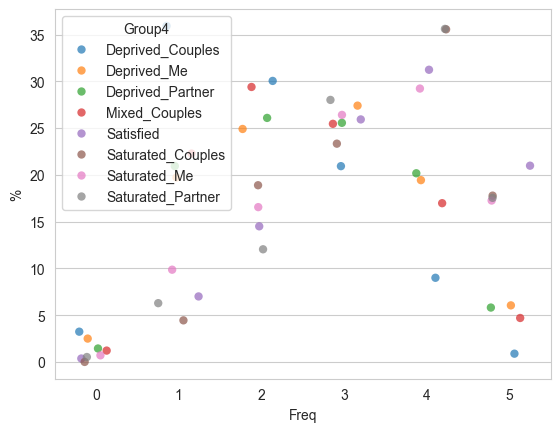

In [83]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(
    data=frequencies,
    x='Freq',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.7
)

plt.ylabel('%')
plt.show()

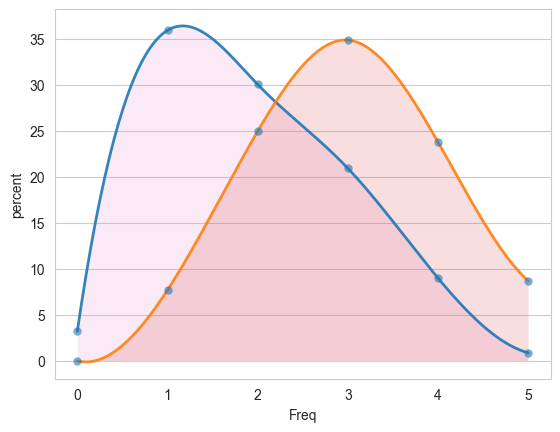

In [88]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

frequencies =  frequencies[frequencies['Group4'] == 'Deprived_Couples']
desires =  desires[desires['Group4'] == 'Deprived_Couples']

ax = sns.stripplot(
    data=frequencies,
    x='Freq',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    frequencies
    .groupby(['Group4', 'Freq'])['percent']
    .mean()
    .reset_index()
)


from scipy.interpolate import make_interp_spline

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Freq')

    x = gdf['Freq'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

ax = sns.stripplot(
    data=desires,
    x='Des',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    desires
    .groupby(['Group4', 'Des'])['percent']
    .mean()
    .reset_index()
)

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Des')

    x = gdf['Des'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

plt.legend().remove()